In [104]:
import pandas as pd
df = pd.read_csv("Video_Games_Sales_as_at_22_Dec_2016pluspropre.csv", sep=",")

In [105]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Guitar Hero III: Legends of Rock,PS2,2007,Misc,Activision,3.49,0.01,0.01,1.48,4.98,82.0,24.0,8.2,46,"Neversoft Entertainment, BudCat",T
1,Link's Crossbow Training,Wii,2007,Shooter,Nintendo,3.05,1.17,0.29,0.46,4.98,68.0,34.0,7.1,47,Nintendo,T
2,Fallout 3,X360,2008,Role-Playing,Bethesda Softworks,3.40,0.99,0.09,0.45,4.93,93.0,84.0,8.5,1655,Bethesda Game Studios,M
3,Uncharted: Drake's Fortune,PS3,2007,Action,Sony Computer Entertainment,2.31,1.72,0.12,0.77,4.92,88.0,66.0,8.1,2306,"Naughty Dog, SCE/WWS",T
4,Madden NFL 06,PS2,2005,Sports,Electronic Arts,3.98,0.26,0.01,0.66,4.91,88.0,29.0,8.0,121,EA Sports,E


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

In [65]:
#fig1 = plt.catplot(figsize=(14,20))
#dx=df.groupby("Genre").median().reset_index()
#dx.sort_values(by= dx.Global_Sales.median())
dx1=df.groupby("Genre").median().sort_values('Global_Sales',ascending=False)
dx2=df.groupby("Genre").median().sort_values('User_Score',ascending=False)
dy1=df.groupby("Genre").mean().sort_values('Global_Sales',ascending=False)
dy2=df.groupby("Genre").mean().sort_values('User_Score',ascending=False)

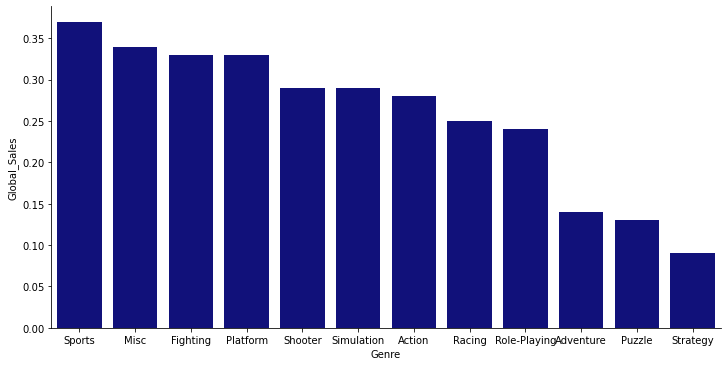

In [71]:
fig11 = sns.catplot(x=dx1.index, y="Global_Sales",color='darkblue', data=dx1, kind='bar',height=5, aspect=2)

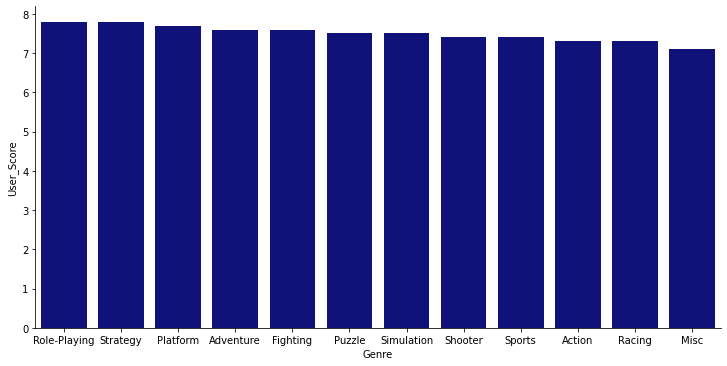

In [72]:
fig11 = sns.catplot(x=dx2.index, y="User_Score", color='darkblue',data=dx2, kind='bar',height=5, aspect=2)


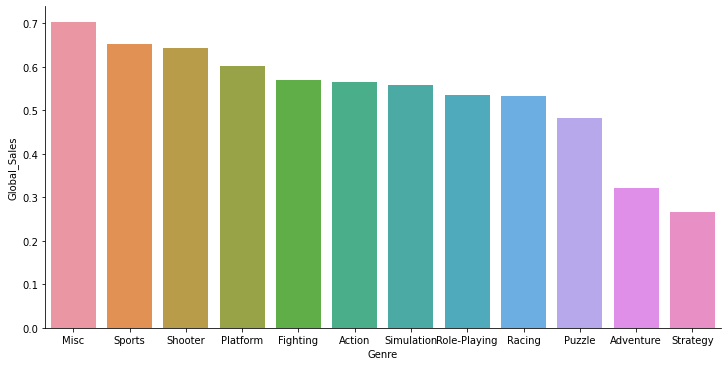

In [68]:
fig12 = sns.catplot(x=dy1.index, y="Global_Sales", data=dy1, kind='bar',height=5, aspect=2)


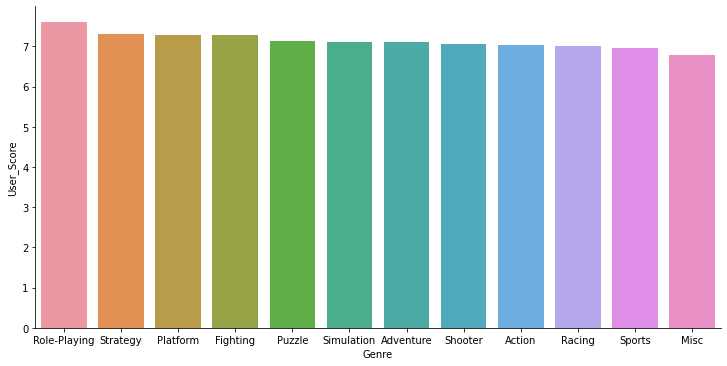

In [69]:
fig21 = sns.catplot(x=dy2.index, y="User_Score", data=dy2, kind='bar',height=5, aspect=2)

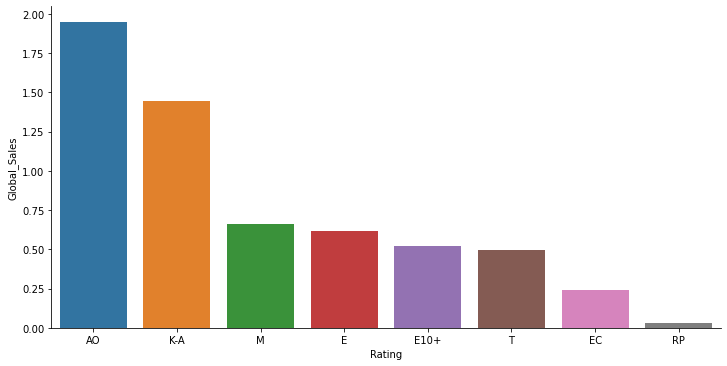

In [81]:
dr=df.groupby("Rating").mean().sort_values('Global_Sales',ascending=False)
fig11 = sns.catplot(x=dr.index, y="Global_Sales", data=dr, kind='bar',height=5, aspect=2)

AO- Adults Only (Adultes uniquement à partir de 18 ans)/Adultes seulement

K-A- Kids to Adults (Des enfants aux parents)- > E

M- Mature (Mature à partir de 17 ans)/Jeunes adultes

E- Everyone (Tout le monde)/Enfants et adultes

E10+- Everyone 10+ (Tout le monde au-dessus de 10 ans)/Enfants et adultes 10+

T- Teen (Adolescents)/Adolescents

EC-Early Childhood (Petite enfance)/Jeunes enfants

RP- Rating Pending (En attente de classement)/Cote en instance

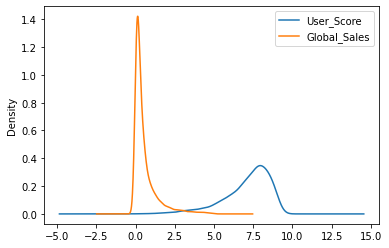

In [73]:
df[['User_Score','Global_Sales']].plot(kind='kde');

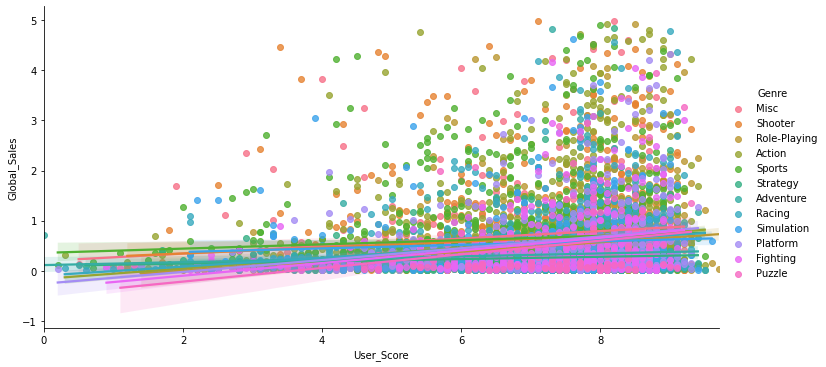

In [10]:
fig31 = sns.lmplot(x='User_Score', y='Global_Sales', hue='Genre', data=df,height=5, aspect=2)

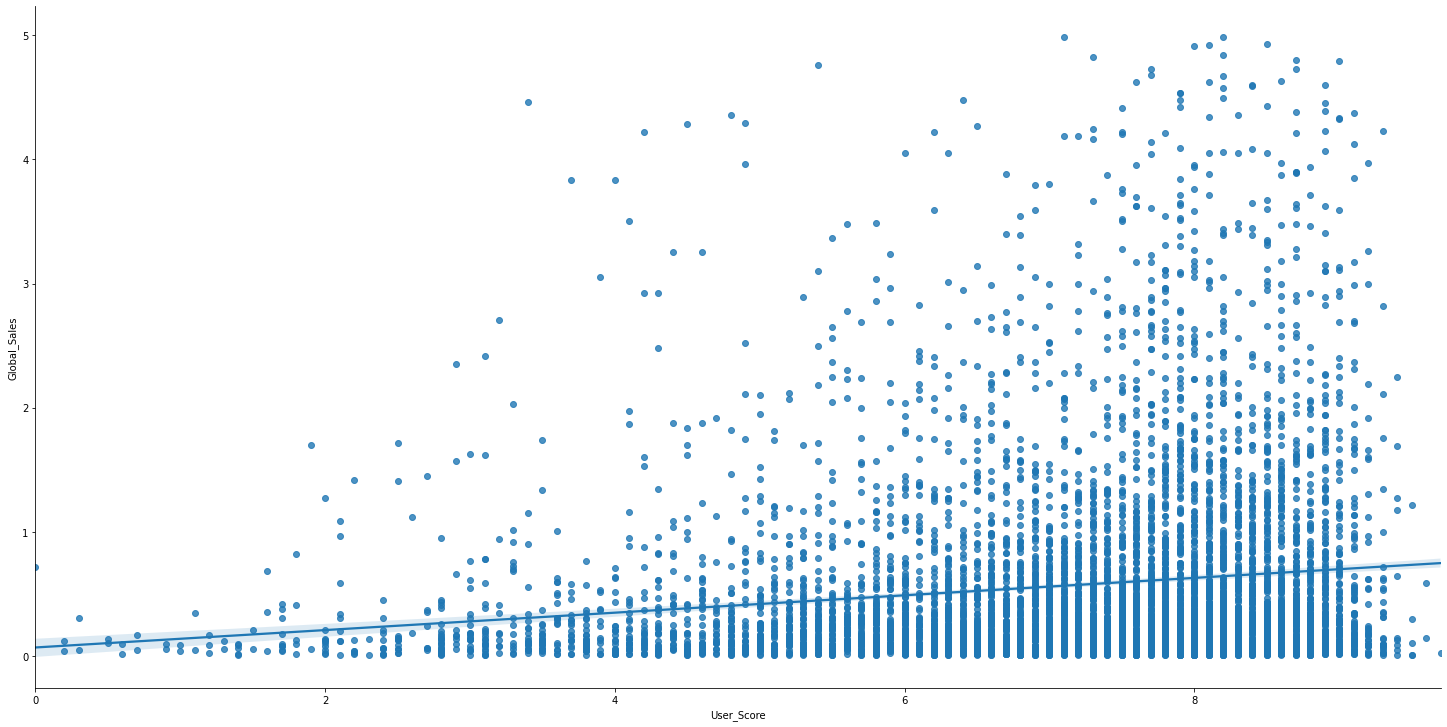

In [11]:
fig31 = sns.lmplot(x='User_Score', y='Global_Sales', data=df,height=10, aspect=2)

In [12]:
import numpy as np

In [13]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(df[['Global_Sales']], df.User_Score)
reg.predict(np.array([[2]]))

array([7.49570563])

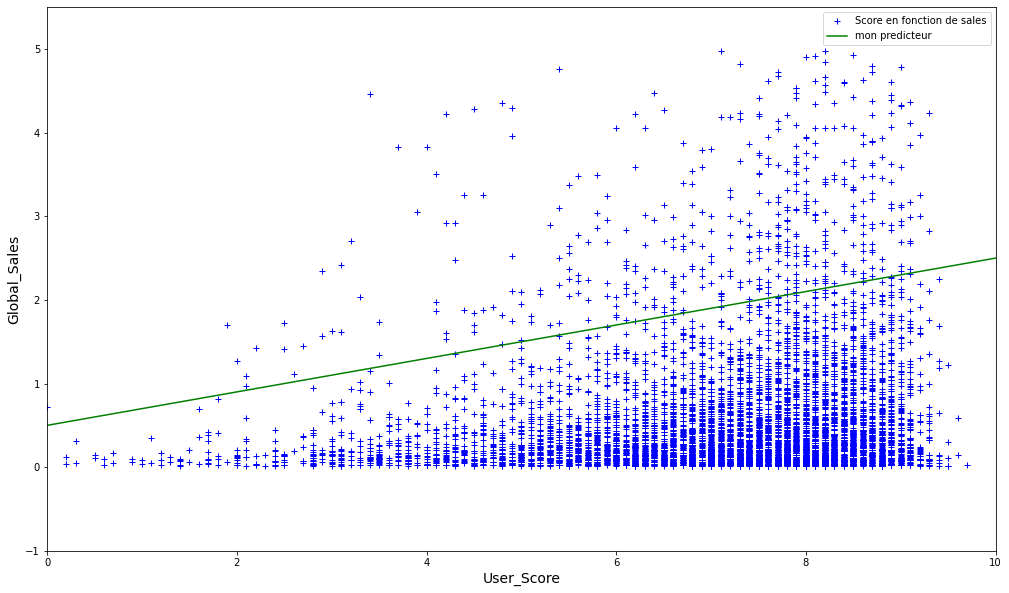

In [138]:
def pred_a(x):
    a=0.2
    b=0.5
    f=[]
    for elem in x:
        f.append(a*elem+b)
    return f

xl=[0,10]

fig = plt.figure(figsize=(17,10))
plt.plot(df['User_Score'],df['Global_Sales'],'+',c='blue',label='Score en fonction de sales')
plt.plot(xl,pred_a(xl),c='green',label='mon predicteur')
plt.xlabel('User_Score', fontsize=14)
plt.ylabel('Global_Sales', fontsize=14)
plt.xlim([0,10])
plt.ylim([-1,5.5])
plt.legend()
plt.show()

In [74]:
#calc a
x=df['User_Score']
y=df['Global_Sales']

un=len(x)*(df['User_Score']*df['Global_Sales']).sum()

sumx=df['User_Score'].sum()
sumy=df['Global_Sales'].sum()

deux=len(df['User_Score'])*((df['User_Score']*df['User_Score']).sum())

trois=sumx*sumx

a=(un-(sumx*sumy))/(deux-trois)
a

0.06999125142311795

In [16]:
# Puis calcul du b
quatre=sumy*((df['User_Score']*df['User_Score']).sum())
cinq=sumx*(df['User_Score']*df['Global_Sales']).sum()
six=len(df['User_Score'])*((df['User_Score']*df['User_Score']).sum())
sept=sumx*sumx

b=(quatre-cinq)/(six-sept)
b

0.07091717366710866

In [17]:
a=0.06999125142311795
b=0.07091717366710866

def pred(x,a,b):
    return a*x+b

pred(5,a,b)

0.4208734307826984

##  Evaluation de résultat

In [18]:
import math

est_p=[pred(i,a,b) for i in x]
est_pa=pred_a(x) 

print("RMSE du meilleur predicteur selon moindre carré",math.sqrt(((pd.Series(est_p)-df['Global_Sales'])**2).sum()/len(df)))
print("RMSE du predicteur identifié analytiquement", math.sqrt(((pd.Series(est_pa)-df['Global_Sales'])**2).sum()/len(df)))

RMSE du meilleur predicteur selon moindre carré 0.7643887521997268
RMSE du predicteur identifié analytiquement 0.764944181493942


In [46]:
def rmse(data_x,data_y):
    i = 0
    res = 0
    
    for i in range(len(data_x)):
              
        res += ((nouv_pred(data_x[i])-data_y[i])**2)/len(data_x)
    
    return math.sqrt(res)


def nouv_pred(x):
    a=0.06999125142311795
    b=0.07091717366710866
    return a*x+b
nouv_pred(x)
rmse(df['User_Score'],df['Global_Sales'])

0.7643887521997313

In [75]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(df['Global_Sales'], est_p))
print(rmse)

0.7643887521997268


In [22]:
dfd = pd.read_csv("SalesRegion.csv", sep=",")

In [34]:
dfd=dfd[['SalesRegion','NA_Sales','Global_Sales']]
dfd

,SalesRegion,NA_Sales,Global_Sales
0,NA_Sales,3.05,4.98
1,NA_Sales,3.49,4.98
2,NA_Sales,3.4,4.93
3,NA_Sales,2.31,4.92
4,NA_Sales,3.98,4.91
...,...,...,...
14470,EU_Sales,0,0.01
14471,EU_Sales,0,0.01
14472,EU_Sales,0.01,0.01
14473,EU_Sales,0.01,0.01


TypeError: Could not convert 4.984.984.934.924.914.844.824.84.794.764.734.734.684.674.634.624.624.64.64.594.574.534.534.494.484.484.464.454.434.424.414.394.384.374.364.364.344.334.324.294.284.274.244.234.234.224.224.224.214.214.24.194.194.164.144.124.094.084.074.064.054.054.054.054.054.043.973.973.963.953.953.943.943.93.93.893.883.883.873.873.853.843.833.833.83.793.763.763.733.713.713.713.73.673.663.653.653.643.633.623.623.623.613.613.63.593.593.593.583.543.543.533.523.513.53.53.493.493.483.483.473.463.453.443.443.423.413.413.43.393.393.393.383.373.353.333.323.313.313.33.283.283.273.263.253.253.243.233.233.213.183.183.183.173.173.173.153.143.143.133.133.123.113.113.113.13.13.13.13.093.083.073.053.053.053.053.043.043.033.033.023.013.0133332.992.992.992.962.962.962.962.952.952.942.942.942.932.922.922.922.912.92.92.892.892.892.892.892.872.862.862.852.842.832.832.822.822.822.812.82.792.792.782.782.782.782.782.772.772.772.762.762.752.732.712.72.72.72.72.692.692.692.692.682.672.672.672.672.662.662.652.652.652.652.652.632.632.632.622.622.622.622.612.612.62.592.582.582.582.582.572.572.572.562.562.562.542.542.532.522.522.522.522.52.52.492.482.482.472.472.472.472.462.452.452.452.432.432.422.422.422.422.412.412.412.412.42.42.382.382.372.372.372.372.372.372.372.352.352.342.342.342.342.342.322.312.312.312.32.292.292.282.282.282.282.282.282.272.272.262.262.262.252.252.252.252.252.242.242.242.242.232.232.232.232.232.222.222.222.212.212.22.22.22.22.22.22.192.192.192.182.182.182.162.162.162.162.162.152.152.142.142.132.132.132.122.122.112.112.112.112.12.12.12.12.092.092.092.092.082.082.082.082.082.082.082.082.072.072.072.072.062.062.062.062.052.052.052.052.042.042.042.042.042.032.032.032.032.022.022.022.022.012.012.012.012221.991.991.981.981.981.981.971.971.961.961.951.951.951.951.951.941.941.941.941.941.941.941.941.941.931.931.931.931.921.921.921.921.921.921.921.911.911.911.91.891.891.881.881.881.881.881.881.871.871.871.861.861.861.861.861.861.861.851.851.851.841.841.841.831.831.831.821.821.821.821.821.821.811.811.811.811.81.81.81.81.81.791.791.781.781.771.771.761.761.761.761.761.761.761.761.761.761.751.751.751.751.751.751.751.741.741.741.741.741.731.731.731.731.731.721.721.721.721.721.711.711.711.711.71.71.71.71.71.71.691.691.691.691.691.691.681.681.681.681.681.681.671.671.671.671.671.671.671.671.671.671.671.671.661.661.661.661.661.661.661.661.661.651.651.651.651.651.651.651.641.641.641.631.631.631.631.631.631.631.621.621.621.621.621.621.621.621.611.611.61.61.61.61.61.61.591.591.591.591.591.581.581.581.581.581.581.581.571.571.571.571.571.571.571.571.571.571.571.571.561.561.561.561.561.551.551.551.551.551.551.551.551.541.541.541.541.541.541.531.531.531.531.531.531.521.521.521.521.521.511.511.511.511.511.511.511.511.51.51.51.51.51.51.491.491.491.491.491.491.491.481.481.481.481.481.481.481.481.481.481.471.471.471.461.461.461.461.461.461.451.451.451.451.451.451.451.451.441.441.441.441.441.431.431.431.431.431.431.431.431.421.421.421.421.421.421.421.421.421.421.421.411.411.411.411.411.411.411.411.41.41.41.41.41.41.41.41.41.41.391.391.381.381.381.381.381.381.381.381.381.381.381.371.371.371.371.371.371.371.361.361.361.361.361.361.361.351.351.351.351.351.351.351.351.351.351.351.351.351.341.341.341.341.341.341.341.341.341.341.341.341.341.341.341.341.341.341.331.331.331.331.321.321.321.321.321.321.321.321.311.311.311.311.311.311.311.311.31.31.31.31.31.31.31.291.291.291.291.291.291.291.291.291.291.291.291.291.281.281.281.281.281.281.271.271.271.271.271.271.271.271.271.271.271.271.271.271.271.271.271.271.271.271.261.261.261.261.261.251.251.251.251.251.251.251.251.251.251.251.251.251.251.251.241.241.241.241.241.241.241.241.231.231.231.231.231.231.231.231.231.231.231.231.231.231.231.221.221.221.221.221.221.211.211.211.211.211.211.211.211.211.211.211.211.211.211.211.21.21.21.21.21.21.21.21.21.191.191.191.191.191.191.191.191.191.191.181.181.181.181.181.181.171.171.171.171.171.171.171.171.171.171.171.171.171.171.161.161.161.161.161.161.161.161.161.161.161.151.151.151.151.151.151.151.151.151.151.151.141.141.141.141.141.141.141.141.141.141.141.141.141.141.131.131.131.131.131.131.131.131.131.131.121.121.121.121.121.121.121.121.121.121.121.121.121.121.121.111.111.111.111.111.111.111.111.11.11.11.11.11.11.11.11.091.091.091.091.091.091.091.091.091.091.091.091.091.091.091.091.081.081.081.081.081.081.081.081.081.081.081.081.071.071.071.071.071.071.071.071.071.071.071.071.071.071.061.061.061.061.061.061.061.061.061.061.061.061.061.061.061.061.061.061.061.061.061.051.051.051.051.051.051.051.051.051.051.051.051.041.041.041.041.041.041.041.041.041.041.031.031.031.031.031.031.031.031.031.031.031.031.031.031.031.031.021.021.021.021.021.021.021.021.021.021.021.021.021.021.021.021.021.021.021.011.011.011.011.011.011.011.011.011.011111110.990.990.990.990.990.990.990.990.990.990.990.990.990.990.990.980.980.980.980.980.980.980.980.980.980.980.970.970.970.970.970.970.970.970.970.970.970.970.970.970.970.970.970.970.960.960.960.960.960.960.960.960.960.960.960.960.950.950.950.950.950.950.950.950.950.950.950.950.950.950.950.950.950.950.940.940.940.940.940.940.940.940.940.940.940.940.940.940.940.930.930.930.930.930.930.930.930.930.930.930.930.930.930.930.930.930.930.930.930.930.930.930.920.920.920.920.920.920.920.920.920.920.920.920.920.920.920.920.910.910.910.910.910.910.910.910.910.910.910.910.910.910.90.90.90.90.90.90.90.90.90.90.90.90.90.90.90.90.90.90.90.90.90.90.90.90.90.890.890.890.890.890.890.890.890.890.890.890.890.890.890.890.890.890.890.890.890.880.880.880.880.880.880.880.880.880.880.880.880.880.880.880.880.880.880.870.870.870.870.870.870.870.870.870.870.870.870.870.870.870.870.870.870.870.870.870.870.870.870.860.860.860.860.860.860.860.860.860.850.850.850.850.850.850.850.850.850.850.850.850.850.850.850.850.850.840.840.840.840.840.840.840.840.840.840.840.840.840.840.840.840.840.840.830.830.830.830.830.830.830.830.830.830.830.830.830.830.830.830.820.820.820.820.820.820.820.820.820.820.820.820.820.820.820.810.810.810.810.810.810.810.810.810.810.810.810.810.810.810.80.80.80.80.80.80.80.80.80.80.80.80.80.80.80.790.790.790.790.790.790.790.790.790.790.790.790.790.790.790.790.790.790.790.790.790.790.790.790.780.780.780.780.780.780.780.780.780.780.780.780.780.780.780.780.780.780.770.770.770.770.770.770.770.770.770.770.770.770.770.770.770.770.770.770.770.760.760.760.760.760.760.760.760.760.760.760.760.760.760.760.760.760.750.750.750.750.750.750.750.750.750.750.750.750.750.750.750.750.750.750.750.750.750.750.750.750.750.740.740.740.740.740.740.740.740.740.740.740.740.740.740.740.740.740.740.740.740.740.740.740.740.730.730.730.730.730.730.730.730.730.730.730.730.730.730.730.730.730.730.730.730.730.730.730.720.720.720.720.720.720.720.720.720.720.720.720.720.720.720.720.720.720.720.720.720.720.720.720.720.720.720.720.720.710.710.710.710.710.710.710.710.710.710.710.710.710.710.710.710.710.710.710.710.710.70.70.70.70.70.70.70.70.70.70.70.70.70.70.70.70.70.70.70.70.70.70.70.70.70.70.70.70.690.690.690.690.690.690.690.690.690.690.690.690.690.690.690.690.690.690.690.680.680.680.680.680.680.680.680.680.680.680.680.680.680.680.680.680.680.680.670.670.670.670.670.670.670.670.670.670.670.670.670.670.670.660.660.660.660.660.660.660.660.660.660.660.660.660.660.660.660.660.660.660.660.660.660.660.660.660.660.660.660.660.660.660.660.660.650.650.650.650.650.650.650.650.650.650.650.650.650.650.650.650.650.650.650.650.650.650.640.640.640.640.640.640.640.640.640.640.640.640.640.640.640.640.640.640.640.640.640.640.640.640.640.640.640.640.640.640.640.640.630.630.630.630.630.630.630.630.630.630.630.630.630.630.630.630.630.630.630.630.630.630.630.630.630.630.630.630.630.630.630.630.620.620.620.620.620.620.620.620.620.620.620.620.620.620.620.620.620.620.620.620.620.620.620.620.610.610.610.610.610.610.610.610.610.610.610.610.610.610.610.610.610.610.610.610.610.610.610.610.610.610.610.610.610.610.610.610.610.610.610.610.610.60.60.60.60.60.60.60.60.60.60.60.60.60.60.60.60.60.60.60.60.60.60.60.60.60.60.60.60.60.60.60.590.590.590.590.590.590.590.590.590.590.590.590.590.590.590.590.590.590.590.590.590.590.590.590.590.590.580.580.580.580.580.580.580.580.580.580.580.580.580.580.580.580.580.580.580.580.580.580.580.580.580.580.580.580.580.580.580.580.580.580.580.580.580.570.570.570.570.570.570.570.570.570.570.570.570.570.570.570.570.570.570.570.570.570.570.570.570.570.570.570.570.570.570.570.570.570.570.570.570.570.570.570.570.570.570.560.560.560.560.560.560.560.560.560.560.560.560.560.560.560.560.560.560.560.560.560.560.560.560.560.560.560.560.560.560.560.560.560.560.560.560.560.560.560.560.560.560.560.560.560.560.560.560.550.550.550.550.550.550.550.550.550.550.550.550.550.550.550.550.550.550.550.550.550.550.550.550.550.550.550.550.550.550.550.550.540.540.540.540.540.540.540.540.540.540.540.540.540.540.540.540.540.540.540.540.540.540.540.540.540.540.540.540.540.540.540.540.540.540.540.540.540.540.530.530.530.530.530.530.530.530.530.530.530.530.530.530.530.530.530.530.530.530.530.530.530.530.530.530.530.530.530.530.530.530.530.530.530.530.530.530.530.530.530.530.530.530.530.520.520.520.520.520.520.520.520.520.520.520.520.520.520.520.520.520.520.520.520.520.520.520.520.520.520.520.520.520.520.520.520.520.520.520.520.520.520.520.520.520.520.510.510.510.510.510.510.510.510.510.510.510.510.510.510.510.510.510.510.510.510.510.510.510.510.510.510.510.510.510.510.510.510.510.510.510.510.510.510.510.510.50.50.50.50.50.50.50.50.50.50.50.50.50.50.50.50.50.50.50.50.50.50.50.50.50.50.50.50.50.50.50.50.50.50.50.50.50.50.50.50.50.50.50.490.490.490.490.490.490.490.490.490.490.490.490.490.490.490.490.490.490.490.490.490.490.490.490.490.490.490.490.490.490.490.490.490.490.490.490.490.490.490.490.480.480.480.480.480.480.480.480.480.480.480.480.480.480.480.480.480.480.480.480.480.480.480.480.480.480.480.480.480.480.470.470.470.470.470.470.470.470.470.470.470.470.470.470.470.470.470.470.470.470.470.470.470.470.470.470.470.470.470.470.470.470.470.470.470.470.470.470.470.470.470.470.470.470.470.470.460.460.460.460.460.460.460.460.460.460.460.460.460.460.460.460.460.460.460.460.460.460.460.460.460.460.460.460.460.460.460.460.460.460.460.460.460.450.450.450.450.450.450.450.450.450.450.450.450.450.450.450.450.450.450.450.450.450.450.450.450.450.450.450.450.450.450.450.450.450.450.450.450.450.450.450.450.450.450.450.450.450.450.450.440.440.440.440.440.440.440.440.440.440.440.440.440.440.440.440.440.440.440.440.440.440.440.440.440.440.440.440.440.440.440.440.440.440.440.440.440.440.440.440.440.440.440.440.440.440.430.430.430.430.430.430.430.430.430.430.430.430.430.430.430.430.430.430.430.430.430.430.430.430.430.430.430.430.430.430.430.430.430.430.430.430.430.430.430.430.430.430.430.430.430.430.430.430.420.420.420.420.420.420.420.420.420.420.420.420.420.420.420.420.420.420.420.420.420.420.420.420.420.420.420.420.420.420.420.420.420.420.420.420.420.420.420.420.420.420.420.420.420.420.420.420.420.420.420.420.420.420.420.420.420.420.420.420.420.410.410.410.410.410.410.410.410.410.410.410.410.410.410.410.410.410.410.410.410.410.410.410.410.410.410.410.410.410.410.410.410.410.410.410.410.410.410.410.410.410.410.410.410.410.410.410.410.410.410.410.410.410.410.410.40.40.40.40.40.40.40.40.40.40.40.40.40.40.40.40.40.40.40.40.40.40.40.40.40.40.40.40.40.40.40.40.40.40.40.40.40.40.40.40.40.40.40.40.40.40.40.40.390.390.390.390.390.390.390.390.390.390.390.390.390.390.390.390.390.390.390.390.390.390.390.390.390.390.390.390.390.390.390.390.390.390.390.390.390.390.390.390.390.390.390.390.390.390.390.390.390.390.390.390.390.390.390.380.380.380.380.380.380.380.380.380.380.380.380.380.380.380.380.380.380.380.380.380.380.380.380.380.380.380.380.380.380.380.380.380.380.380.380.380.380.380.380.380.380.380.380.380.380.380.380.380.380.380.380.370.370.370.370.370.370.370.370.370.370.370.370.370.370.370.370.370.370.370.370.370.370.370.370.370.370.370.370.370.370.370.370.370.370.370.370.370.370.370.370.370.370.370.370.370.370.370.370.370.370.370.370.370.370.370.370.370.360.360.360.360.360.360.360.360.360.360.360.360.360.360.360.360.360.360.360.360.360.360.360.360.360.360.360.360.360.360.360.360.360.360.360.360.360.360.360.360.360.360.360.360.360.350.350.350.350.350.350.350.350.350.350.350.350.350.350.350.350.350.350.350.350.350.350.350.350.350.350.350.350.350.350.350.350.350.350.350.350.350.350.350.350.350.350.350.350.350.350.350.350.350.350.350.350.350.350.340.340.340.340.340.340.340.340.340.340.340.340.340.340.340.340.340.340.340.340.340.340.340.340.340.340.340.340.340.340.340.340.340.340.340.340.340.340.340.340.340.340.340.340.340.340.340.340.340.340.340.330.330.330.330.330.330.330.330.330.330.330.330.330.330.330.330.330.330.330.330.330.330.330.330.330.330.330.330.330.330.330.330.330.330.330.330.330.330.330.330.330.330.330.330.330.330.330.330.330.330.330.330.330.330.330.330.330.330.330.330.330.330.330.320.320.320.320.320.320.320.320.320.320.320.320.320.320.320.320.320.320.320.320.320.320.320.320.320.320.320.320.320.320.320.320.320.320.320.320.320.320.320.320.320.320.320.320.320.320.320.320.320.320.320.320.320.320.320.320.320.320.320.320.320.320.320.320.320.320.320.320.320.320.320.320.320.320.320.320.320.310.310.310.310.310.310.310.310.310.310.310.310.310.310.310.310.310.310.310.310.310.310.310.310.310.310.310.310.310.310.310.310.310.310.310.310.310.310.310.310.310.310.310.310.310.310.310.310.310.310.310.310.310.310.310.310.30.30.30.30.30.30.30.30.30.30.30.30.30.30.30.30.30.30.30.30.30.30.30.30.30.30.30.30.30.30.30.30.30.30.30.30.30.30.30.30.30.30.30.30.30.30.30.30.30.30.290.290.290.290.290.290.290.290.290.290.290.290.290.290.290.290.290.290.290.290.290.290.290.290.290.290.290.290.290.290.290.290.290.290.290.290.290.290.290.290.290.290.290.290.290.290.290.290.290.290.290.290.290.290.290.290.290.290.290.290.290.290.290.290.290.290.290.290.290.290.290.290.290.290.290.290.290.290.290.290.290.290.280.280.280.280.280.280.280.280.280.280.280.280.280.280.280.280.280.280.280.280.280.280.280.280.280.280.280.280.280.280.280.280.280.280.280.280.280.280.280.280.280.280.280.280.280.280.280.280.280.280.280.280.280.280.280.280.280.280.280.280.280.280.280.280.280.280.280.280.280.280.280.280.280.270.270.270.270.270.270.270.270.270.270.270.270.270.270.270.270.270.270.270.270.270.270.270.270.270.270.270.270.270.270.270.270.270.270.270.270.270.270.270.270.270.270.270.270.270.270.270.270.270.270.270.270.270.270.270.270.270.270.270.270.270.270.270.270.270.270.270.270.270.270.270.270.270.270.270.260.260.260.260.260.260.260.260.260.260.260.260.260.260.260.260.260.260.260.260.260.260.260.260.260.260.260.260.260.260.260.260.260.260.260.260.260.260.260.260.260.260.260.260.260.260.260.260.260.260.260.260.260.260.260.260.260.260.260.260.260.260.260.260.260.260.260.260.260.260.260.260.260.260.260.260.250.250.250.250.250.250.250.250.250.250.250.250.250.250.250.250.250.250.250.250.250.250.250.250.250.250.250.250.250.250.250.250.250.250.250.250.250.250.250.250.250.250.250.250.250.250.250.250.250.250.250.250.250.250.250.250.250.250.250.250.250.250.250.250.250.250.250.250.250.250.250.250.250.250.250.250.250.250.250.250.250.250.250.240.240.240.240.240.240.240.240.240.240.240.240.240.240.240.240.240.240.240.240.240.240.240.240.240.240.240.240.240.240.240.240.240.240.240.240.240.240.240.240.240.240.240.240.240.240.240.240.240.240.240.240.240.240.240.240.240.240.240.240.240.240.240.240.240.240.240.240.240.240.240.240.240.240.240.240.240.240.240.240.240.240.240.240.240.240.240.240.240.240.240.240.240.240.240.230.230.230.230.230.230.230.230.230.230.230.230.230.230.230.230.230.230.230.230.230.230.230.230.230.230.230.230.230.230.230.230.230.230.230.230.230.230.230.230.230.230.230.230.230.230.230.230.230.230.230.230.230.230.230.230.230.230.230.230.230.230.230.230.230.230.230.230.230.230.230.230.230.230.230.230.230.230.230.230.220.220.220.220.220.220.220.220.220.220.220.220.220.220.220.220.220.220.220.220.220.220.220.220.220.220.220.220.220.220.220.220.220.220.220.220.220.220.220.220.220.220.220.220.220.220.220.220.220.220.220.220.220.220.220.220.220.220.220.220.220.220.220.220.220.220.220.220.220.220.220.220.220.220.220.220.220.220.220.220.220.210.210.210.210.210.210.210.210.210.210.210.210.210.210.210.210.210.210.210.210.210.210.210.210.210.210.210.210.210.210.210.210.210.210.210.210.210.210.210.210.210.210.210.210.210.210.210.210.210.210.210.210.210.210.210.210.210.210.210.210.210.210.210.210.210.210.210.210.210.210.210.210.210.210.210.210.210.210.210.210.210.210.210.210.210.210.210.210.210.210.210.210.210.210.210.210.210.210.210.210.210.210.210.210.210.210.210.20.20.20.20.20.20.20.20.20.20.20.20.20.20.20.20.20.20.20.20.20.20.20.20.20.20.20.20.20.20.20.20.20.20.20.20.20.20.20.20.20.20.20.20.20.20.20.20.20.20.20.20.20.20.20.20.20.20.20.20.20.20.20.20.20.20.20.20.20.20.20.20.20.20.20.20.20.20.20.20.20.20.20.20.20.20.20.20.20.20.20.20.20.20.20.20.20.20.20.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.180.180.180.180.180.180.180.180.180.180.180.180.180.180.180.180.180.180.180.180.180.180.180.180.180.180.180.180.180.180.180.180.180.180.180.180.180.180.180.180.180.180.180.180.180.180.180.180.180.180.180.180.180.180.180.180.180.180.180.180.180.180.180.180.180.180.180.180.180.180.180.180.180.180.180.180.180.180.180.180.180.180.180.180.180.180.180.180.180.180.180.180.180.180.180.180.180.180.180.180.180.180.180.180.180.180.180.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.160.160.160.160.160.160.160.160.160.160.160.160.160.160.160.160.160.160.160.160.160.160.160.160.160.160.160.160.160.160.160.160.160.160.160.160.160.160.160.160.160.160.160.160.160.160.160.160.160.160.160.160.160.160.160.160.160.160.160.160.160.160.160.160.160.160.160.160.160.160.160.160.160.160.160.160.160.160.160.160.160.160.160.160.160.160.160.160.160.160.160.160.160.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.01Global_Sales4.984.984.934.924.914.844.824.84.794.764.734.734.684.674.634.624.624.64.64.594.574.534.534.494.484.484.464.454.434.424.414.394.384.374.364.364.344.334.324.294.284.274.244.234.234.224.224.224.214.214.24.194.194.164.144.124.094.084.074.064.054.054.054.054.054.043.973.973.963.953.953.943.943.93.93.893.883.883.873.873.853.843.833.833.83.793.763.763.733.713.713.713.73.673.663.653.653.643.633.623.623.623.613.613.63.593.593.593.583.543.543.533.523.513.53.53.493.493.483.483.473.463.453.443.443.423.413.413.43.393.393.393.383.373.353.333.323.313.313.33.283.283.273.263.253.253.243.233.233.213.183.183.183.173.173.173.153.143.143.133.133.123.113.113.113.13.13.13.13.093.083.073.053.053.053.053.043.043.033.033.023.013.0133332.992.992.992.962.962.962.962.952.952.942.942.942.932.922.922.922.912.92.92.892.892.892.892.892.872.862.862.852.842.832.832.822.822.822.812.82.792.792.782.782.782.782.782.772.772.772.762.762.752.732.712.72.72.72.72.692.692.692.692.682.672.672.672.672.662.662.652.652.652.652.652.632.632.632.622.622.622.622.612.612.62.592.582.582.582.582.572.572.572.562.562.562.542.542.532.522.522.522.522.52.52.492.482.482.472.472.472.472.462.452.452.452.432.432.422.422.422.422.412.412.412.412.42.42.382.382.372.372.372.372.372.372.372.352.352.342.342.342.342.342.322.312.312.312.32.292.292.282.282.282.282.282.282.272.272.262.262.262.252.252.252.252.252.242.242.242.242.232.232.232.232.232.222.222.222.212.212.22.22.22.22.22.22.192.192.192.182.182.182.162.162.162.162.162.152.152.142.142.132.132.132.122.122.112.112.112.112.12.12.12.12.092.092.092.092.082.082.082.082.082.082.082.082.072.072.072.072.062.062.062.062.052.052.052.052.042.042.042.042.042.032.032.032.032.022.022.022.022.012.012.012.012221.991.991.981.981.981.981.971.971.961.961.951.951.951.951.951.941.941.941.941.941.941.941.941.941.931.931.931.931.921.921.921.921.921.921.921.911.911.911.91.891.891.881.881.881.881.881.881.871.871.871.861.861.861.861.861.861.861.851.851.851.841.841.841.831.831.831.821.821.821.821.821.821.811.811.811.811.81.81.81.81.81.791.791.781.781.771.771.761.761.761.761.761.761.761.761.761.761.751.751.751.751.751.751.751.741.741.741.741.741.731.731.731.731.731.721.721.721.721.721.711.711.711.711.71.71.71.71.71.71.691.691.691.691.691.691.681.681.681.681.681.681.671.671.671.671.671.671.671.671.671.671.671.671.661.661.661.661.661.661.661.661.661.651.651.651.651.651.651.651.641.641.641.631.631.631.631.631.631.631.621.621.621.621.621.621.621.621.611.611.61.61.61.61.61.61.591.591.591.591.591.581.581.581.581.581.581.581.571.571.571.571.571.571.571.571.571.571.571.571.561.561.561.561.561.551.551.551.551.551.551.551.551.541.541.541.541.541.541.531.531.531.531.531.531.521.521.521.521.521.511.511.511.511.511.511.511.511.51.51.51.51.51.51.491.491.491.491.491.491.491.481.481.481.481.481.481.481.481.481.481.471.471.471.461.461.461.461.461.461.451.451.451.451.451.451.451.451.441.441.441.441.441.431.431.431.431.431.431.431.431.421.421.421.421.421.421.421.421.421.421.421.411.411.411.411.411.411.411.411.41.41.41.41.41.41.41.41.41.41.391.391.381.381.381.381.381.381.381.381.381.381.381.371.371.371.371.371.371.371.361.361.361.361.361.361.361.351.351.351.351.351.351.351.351.351.351.351.351.351.341.341.341.341.341.341.341.341.341.341.341.341.341.341.341.341.341.341.331.331.331.331.321.321.321.321.321.321.321.321.311.311.311.311.311.311.311.311.31.31.31.31.31.31.31.291.291.291.291.291.291.291.291.291.291.291.291.291.281.281.281.281.281.281.271.271.271.271.271.271.271.271.271.271.271.271.271.271.271.271.271.271.271.271.261.261.261.261.261.251.251.251.251.251.251.251.251.251.251.251.251.251.251.251.241.241.241.241.241.241.241.241.231.231.231.231.231.231.231.231.231.231.231.231.231.231.231.221.221.221.221.221.221.211.211.211.211.211.211.211.211.211.211.211.211.211.211.211.21.21.21.21.21.21.21.21.21.191.191.191.191.191.191.191.191.191.191.181.181.181.181.181.181.171.171.171.171.171.171.171.171.171.171.171.171.171.171.161.161.161.161.161.161.161.161.161.161.161.151.151.151.151.151.151.151.151.151.151.151.141.141.141.141.141.141.141.141.141.141.141.141.141.141.131.131.131.131.131.131.131.131.131.131.121.121.121.121.121.121.121.121.121.121.121.121.121.121.121.111.111.111.111.111.111.111.111.11.11.11.11.11.11.11.11.091.091.091.091.091.091.091.091.091.091.091.091.091.091.091.091.081.081.081.081.081.081.081.081.081.081.081.081.071.071.071.071.071.071.071.071.071.071.071.071.071.071.061.061.061.061.061.061.061.061.061.061.061.061.061.061.061.061.061.061.061.061.061.051.051.051.051.051.051.051.051.051.051.051.051.041.041.041.041.041.041.041.041.041.041.031.031.031.031.031.031.031.031.031.031.031.031.031.031.031.031.021.021.021.021.021.021.021.021.021.021.021.021.021.021.021.021.021.021.021.011.011.011.011.011.011.011.011.011.011111110.990.990.990.990.990.990.990.990.990.990.990.990.990.990.990.980.980.980.980.980.980.980.980.980.980.980.970.970.970.970.970.970.970.970.970.970.970.970.970.970.970.970.970.970.960.960.960.960.960.960.960.960.960.960.960.960.950.950.950.950.950.950.950.950.950.950.950.950.950.950.950.950.950.950.940.940.940.940.940.940.940.940.940.940.940.940.940.940.940.930.930.930.930.930.930.930.930.930.930.930.930.930.930.930.930.930.930.930.930.930.930.930.920.920.920.920.920.920.920.920.920.920.920.920.920.920.920.920.910.910.910.910.910.910.910.910.910.910.910.910.910.910.90.90.90.90.90.90.90.90.90.90.90.90.90.90.90.90.90.90.90.90.90.90.90.90.90.890.890.890.890.890.890.890.890.890.890.890.890.890.890.890.890.890.890.890.890.880.880.880.880.880.880.880.880.880.880.880.880.880.880.880.880.880.880.870.870.870.870.870.870.870.870.870.870.870.870.870.870.870.870.870.870.870.870.870.870.870.870.860.860.860.860.860.860.860.860.860.850.850.850.850.850.850.850.850.850.850.850.850.850.850.850.850.850.840.840.840.840.840.840.840.840.840.840.840.840.840.840.840.840.840.840.830.830.830.830.830.830.830.830.830.830.830.830.830.830.830.830.820.820.820.820.820.820.820.820.820.820.820.820.820.820.820.810.810.810.810.810.810.810.810.810.810.810.810.810.810.810.80.80.80.80.80.80.80.80.80.80.80.80.80.80.80.790.790.790.790.790.790.790.790.790.790.790.790.790.790.790.790.790.790.790.790.790.790.790.790.780.780.780.780.780.780.780.780.780.780.780.780.780.780.780.780.780.780.770.770.770.770.770.770.770.770.770.770.770.770.770.770.770.770.770.770.770.760.760.760.760.760.760.760.760.760.760.760.760.760.760.760.760.760.750.750.750.750.750.750.750.750.750.750.750.750.750.750.750.750.750.750.750.750.750.750.750.750.750.740.740.740.740.740.740.740.740.740.740.740.740.740.740.740.740.740.740.740.740.740.740.740.740.730.730.730.730.730.730.730.730.730.730.730.730.730.730.730.730.730.730.730.730.730.730.730.720.720.720.720.720.720.720.720.720.720.720.720.720.720.720.720.720.720.720.720.720.720.720.720.720.720.720.720.720.710.710.710.710.710.710.710.710.710.710.710.710.710.710.710.710.710.710.710.710.710.70.70.70.70.70.70.70.70.70.70.70.70.70.70.70.70.70.70.70.70.70.70.70.70.70.70.70.70.690.690.690.690.690.690.690.690.690.690.690.690.690.690.690.690.690.690.690.680.680.680.680.680.680.680.680.680.680.680.680.680.680.680.680.680.680.680.670.670.670.670.670.670.670.670.670.670.670.670.670.670.670.660.660.660.660.660.660.660.660.660.660.660.660.660.660.660.660.660.660.660.660.660.660.660.660.660.660.660.660.660.660.660.660.660.650.650.650.650.650.650.650.650.650.650.650.650.650.650.650.650.650.650.650.650.650.650.640.640.640.640.640.640.640.640.640.640.640.640.640.640.640.640.640.640.640.640.640.640.640.640.640.640.640.640.640.640.640.640.630.630.630.630.630.630.630.630.630.630.630.630.630.630.630.630.630.630.630.630.630.630.630.630.630.630.630.630.630.630.630.630.620.620.620.620.620.620.620.620.620.620.620.620.620.620.620.620.620.620.620.620.620.620.620.620.610.610.610.610.610.610.610.610.610.610.610.610.610.610.610.610.610.610.610.610.610.610.610.610.610.610.610.610.610.610.610.610.610.610.610.610.610.60.60.60.60.60.60.60.60.60.60.60.60.60.60.60.60.60.60.60.60.60.60.60.60.60.60.60.60.60.60.60.590.590.590.590.590.590.590.590.590.590.590.590.590.590.590.590.590.590.590.590.590.590.590.590.590.590.580.580.580.580.580.580.580.580.580.580.580.580.580.580.580.580.580.580.580.580.580.580.580.580.580.580.580.580.580.580.580.580.580.580.580.580.580.570.570.570.570.570.570.570.570.570.570.570.570.570.570.570.570.570.570.570.570.570.570.570.570.570.570.570.570.570.570.570.570.570.570.570.570.570.570.570.570.570.570.560.560.560.560.560.560.560.560.560.560.560.560.560.560.560.560.560.560.560.560.560.560.560.560.560.560.560.560.560.560.560.560.560.560.560.560.560.560.560.560.560.560.560.560.560.560.560.560.550.550.550.550.550.550.550.550.550.550.550.550.550.550.550.550.550.550.550.550.550.550.550.550.550.550.550.550.550.550.550.550.540.540.540.540.540.540.540.540.540.540.540.540.540.540.540.540.540.540.540.540.540.540.540.540.540.540.540.540.540.540.540.540.540.540.540.540.540.540.530.530.530.530.530.530.530.530.530.530.530.530.530.530.530.530.530.530.530.530.530.530.530.530.530.530.530.530.530.530.530.530.530.530.530.530.530.530.530.530.530.530.530.530.530.520.520.520.520.520.520.520.520.520.520.520.520.520.520.520.520.520.520.520.520.520.520.520.520.520.520.520.520.520.520.520.520.520.520.520.520.520.520.520.520.520.520.510.510.510.510.510.510.510.510.510.510.510.510.510.510.510.510.510.510.510.510.510.510.510.510.510.510.510.510.510.510.510.510.510.510.510.510.510.510.510.510.50.50.50.50.50.50.50.50.50.50.50.50.50.50.50.50.50.50.50.50.50.50.50.50.50.50.50.50.50.50.50.50.50.50.50.50.50.50.50.50.50.50.50.490.490.490.490.490.490.490.490.490.490.490.490.490.490.490.490.490.490.490.490.490.490.490.490.490.490.490.490.490.490.490.490.490.490.490.490.490.490.490.490.480.480.480.480.480.480.480.480.480.480.480.480.480.480.480.480.480.480.480.480.480.480.480.480.480.480.480.480.480.480.470.470.470.470.470.470.470.470.470.470.470.470.470.470.470.470.470.470.470.470.470.470.470.470.470.470.470.470.470.470.470.470.470.470.470.470.470.470.470.470.470.470.470.470.470.470.460.460.460.460.460.460.460.460.460.460.460.460.460.460.460.460.460.460.460.460.460.460.460.460.460.460.460.460.460.460.460.460.460.460.460.460.460.450.450.450.450.450.450.450.450.450.450.450.450.450.450.450.450.450.450.450.450.450.450.450.450.450.450.450.450.450.450.450.450.450.450.450.450.450.450.450.450.450.450.450.450.450.450.450.440.440.440.440.440.440.440.440.440.440.440.440.440.440.440.440.440.440.440.440.440.440.440.440.440.440.440.440.440.440.440.440.440.440.440.440.440.440.440.440.440.440.440.440.440.440.430.430.430.430.430.430.430.430.430.430.430.430.430.430.430.430.430.430.430.430.430.430.430.430.430.430.430.430.430.430.430.430.430.430.430.430.430.430.430.430.430.430.430.430.430.430.430.430.420.420.420.420.420.420.420.420.420.420.420.420.420.420.420.420.420.420.420.420.420.420.420.420.420.420.420.420.420.420.420.420.420.420.420.420.420.420.420.420.420.420.420.420.420.420.420.420.420.420.420.420.420.420.420.420.420.420.420.420.420.410.410.410.410.410.410.410.410.410.410.410.410.410.410.410.410.410.410.410.410.410.410.410.410.410.410.410.410.410.410.410.410.410.410.410.410.410.410.410.410.410.410.410.410.410.410.410.410.410.410.410.410.410.410.410.40.40.40.40.40.40.40.40.40.40.40.40.40.40.40.40.40.40.40.40.40.40.40.40.40.40.40.40.40.40.40.40.40.40.40.40.40.40.40.40.40.40.40.40.40.40.40.40.390.390.390.390.390.390.390.390.390.390.390.390.390.390.390.390.390.390.390.390.390.390.390.390.390.390.390.390.390.390.390.390.390.390.390.390.390.390.390.390.390.390.390.390.390.390.390.390.390.390.390.390.390.390.390.380.380.380.380.380.380.380.380.380.380.380.380.380.380.380.380.380.380.380.380.380.380.380.380.380.380.380.380.380.380.380.380.380.380.380.380.380.380.380.380.380.380.380.380.380.380.380.380.380.380.380.380.370.370.370.370.370.370.370.370.370.370.370.370.370.370.370.370.370.370.370.370.370.370.370.370.370.370.370.370.370.370.370.370.370.370.370.370.370.370.370.370.370.370.370.370.370.370.370.370.370.370.370.370.370.370.370.370.370.360.360.360.360.360.360.360.360.360.360.360.360.360.360.360.360.360.360.360.360.360.360.360.360.360.360.360.360.360.360.360.360.360.360.360.360.360.360.360.360.360.360.360.360.360.350.350.350.350.350.350.350.350.350.350.350.350.350.350.350.350.350.350.350.350.350.350.350.350.350.350.350.350.350.350.350.350.350.350.350.350.350.350.350.350.350.350.350.350.350.350.350.350.350.350.350.350.350.350.340.340.340.340.340.340.340.340.340.340.340.340.340.340.340.340.340.340.340.340.340.340.340.340.340.340.340.340.340.340.340.340.340.340.340.340.340.340.340.340.340.340.340.340.340.340.340.340.340.340.340.330.330.330.330.330.330.330.330.330.330.330.330.330.330.330.330.330.330.330.330.330.330.330.330.330.330.330.330.330.330.330.330.330.330.330.330.330.330.330.330.330.330.330.330.330.330.330.330.330.330.330.330.330.330.330.330.330.330.330.330.330.330.330.320.320.320.320.320.320.320.320.320.320.320.320.320.320.320.320.320.320.320.320.320.320.320.320.320.320.320.320.320.320.320.320.320.320.320.320.320.320.320.320.320.320.320.320.320.320.320.320.320.320.320.320.320.320.320.320.320.320.320.320.320.320.320.320.320.320.320.320.320.320.320.320.320.320.320.320.320.310.310.310.310.310.310.310.310.310.310.310.310.310.310.310.310.310.310.310.310.310.310.310.310.310.310.310.310.310.310.310.310.310.310.310.310.310.310.310.310.310.310.310.310.310.310.310.310.310.310.310.310.310.310.310.310.30.30.30.30.30.30.30.30.30.30.30.30.30.30.30.30.30.30.30.30.30.30.30.30.30.30.30.30.30.30.30.30.30.30.30.30.30.30.30.30.30.30.30.30.30.30.30.30.30.30.290.290.290.290.290.290.290.290.290.290.290.290.290.290.290.290.290.290.290.290.290.290.290.290.290.290.290.290.290.290.290.290.290.290.290.290.290.290.290.290.290.290.290.290.290.290.290.290.290.290.290.290.290.290.290.290.290.290.290.290.290.290.290.290.290.290.290.290.290.290.290.290.290.290.290.290.290.290.290.290.290.290.280.280.280.280.280.280.280.280.280.280.280.280.280.280.280.280.280.280.280.280.280.280.280.280.280.280.280.280.280.280.280.280.280.280.280.280.280.280.280.280.280.280.280.280.280.280.280.280.280.280.280.280.280.280.280.280.280.280.280.280.280.280.280.280.280.280.280.280.280.280.280.280.280.270.270.270.270.270.270.270.270.270.270.270.270.270.270.270.270.270.270.270.270.270.270.270.270.270.270.270.270.270.270.270.270.270.270.270.270.270.270.270.270.270.270.270.270.270.270.270.270.270.270.270.270.270.270.270.270.270.270.270.270.270.270.270.270.270.270.270.270.270.270.270.270.270.270.270.260.260.260.260.260.260.260.260.260.260.260.260.260.260.260.260.260.260.260.260.260.260.260.260.260.260.260.260.260.260.260.260.260.260.260.260.260.260.260.260.260.260.260.260.260.260.260.260.260.260.260.260.260.260.260.260.260.260.260.260.260.260.260.260.260.260.260.260.260.260.260.260.260.260.260.260.250.250.250.250.250.250.250.250.250.250.250.250.250.250.250.250.250.250.250.250.250.250.250.250.250.250.250.250.250.250.250.250.250.250.250.250.250.250.250.250.250.250.250.250.250.250.250.250.250.250.250.250.250.250.250.250.250.250.250.250.250.250.250.250.250.250.250.250.250.250.250.250.250.250.250.250.250.250.250.250.250.250.250.240.240.240.240.240.240.240.240.240.240.240.240.240.240.240.240.240.240.240.240.240.240.240.240.240.240.240.240.240.240.240.240.240.240.240.240.240.240.240.240.240.240.240.240.240.240.240.240.240.240.240.240.240.240.240.240.240.240.240.240.240.240.240.240.240.240.240.240.240.240.240.240.240.240.240.240.240.240.240.240.240.240.240.240.240.240.240.240.240.240.240.240.240.240.240.230.230.230.230.230.230.230.230.230.230.230.230.230.230.230.230.230.230.230.230.230.230.230.230.230.230.230.230.230.230.230.230.230.230.230.230.230.230.230.230.230.230.230.230.230.230.230.230.230.230.230.230.230.230.230.230.230.230.230.230.230.230.230.230.230.230.230.230.230.230.230.230.230.230.230.230.230.230.230.230.220.220.220.220.220.220.220.220.220.220.220.220.220.220.220.220.220.220.220.220.220.220.220.220.220.220.220.220.220.220.220.220.220.220.220.220.220.220.220.220.220.220.220.220.220.220.220.220.220.220.220.220.220.220.220.220.220.220.220.220.220.220.220.220.220.220.220.220.220.220.220.220.220.220.220.220.220.220.220.220.220.210.210.210.210.210.210.210.210.210.210.210.210.210.210.210.210.210.210.210.210.210.210.210.210.210.210.210.210.210.210.210.210.210.210.210.210.210.210.210.210.210.210.210.210.210.210.210.210.210.210.210.210.210.210.210.210.210.210.210.210.210.210.210.210.210.210.210.210.210.210.210.210.210.210.210.210.210.210.210.210.210.210.210.210.210.210.210.210.210.210.210.210.210.210.210.210.210.210.210.210.210.210.210.210.210.210.210.20.20.20.20.20.20.20.20.20.20.20.20.20.20.20.20.20.20.20.20.20.20.20.20.20.20.20.20.20.20.20.20.20.20.20.20.20.20.20.20.20.20.20.20.20.20.20.20.20.20.20.20.20.20.20.20.20.20.20.20.20.20.20.20.20.20.20.20.20.20.20.20.20.20.20.20.20.20.20.20.20.20.20.20.20.20.20.20.20.20.20.20.20.20.20.20.20.20.20.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.190.180.180.180.180.180.180.180.180.180.180.180.180.180.180.180.180.180.180.180.180.180.180.180.180.180.180.180.180.180.180.180.180.180.180.180.180.180.180.180.180.180.180.180.180.180.180.180.180.180.180.180.180.180.180.180.180.180.180.180.180.180.180.180.180.180.180.180.180.180.180.180.180.180.180.180.180.180.180.180.180.180.180.180.180.180.180.180.180.180.180.180.180.180.180.180.180.180.180.180.180.180.180.180.180.180.180.180.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.170.160.160.160.160.160.160.160.160.160.160.160.160.160.160.160.160.160.160.160.160.160.160.160.160.160.160.160.160.160.160.160.160.160.160.160.160.160.160.160.160.160.160.160.160.160.160.160.160.160.160.160.160.160.160.160.160.160.160.160.160.160.160.160.160.160.160.160.160.160.160.160.160.160.160.160.160.160.160.160.160.160.160.160.160.160.160.160.160.160.160.160.160.160.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.150.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.140.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.130.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.120.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.110.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.090.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.080.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.070.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.060.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.050.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.040.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.030.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.020.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.010.01 to numeric

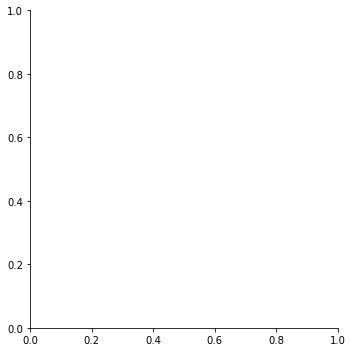

In [35]:
fig7 = sns.lmplot(x='NA_Sales', y='Global_Sales', data=dfd)

In [41]:
(df == 0).astype(int).sum(axis=1)

0       0
1       0
2       0
3       0
4       0
       ..
7232    3
7233    3
7234    3
7235    3
7236    3
Length: 7237, dtype: int64

In [42]:
np.count_nonzero(df)

107467

In [44]:
((df == 0).values.sum())

8325

In [45]:
df.isin([0]).sum()

Name                  0
Platform              0
Year_of_Release       0
Genre                 0
Publisher             0
NA_Sales            630
EU_Sales           1056
JP_Sales           5278
Other_Sales        1360
Global_Sales          0
Critic_Score          0
Critic_Count          0
User_Score            1
User_Count            0
Developer             0
Rating                0
dtype: int64

<AxesSubplot:>

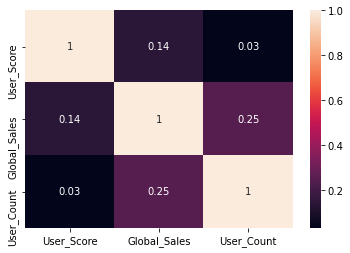

In [86]:
correlation = df[['User_Score','Global_Sales','User_Count']].corr()
sns.heatmap(correlation,
            xticklabels=correlation.columns.values,
            yticklabels=correlation.columns.values,
            annot=True)

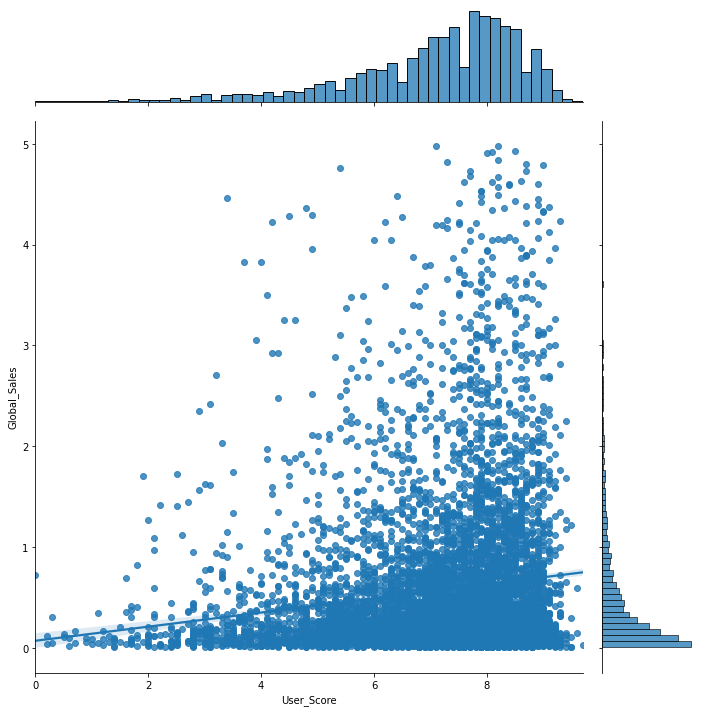

In [92]:
g = sns.JointGrid(x="User_Score", y="Global_Sales", data=df, height=10)
g = g.plot(sns.regplot, sns.histplot)

In [93]:
from sklearn.cluster import KMeans

In [103]:
from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
  
df1 = DataFrame(df,columns=['Global_Sales','User_Score'])
  
kmeans = KMeans(n_clusters=5).fit(df)
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(df['Global_Sales'], df['User_Score'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [98]:
df.isnull().any()

Global_Sales    True
User_Score      True
dtype: bool

In [100]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering

In [106]:
sample_df = df[(df.index % 10) == 0]
sample_df.shape

(724, 16)

In [107]:
sample_df = DataFrame(df,columns=['Global_Sales','User_Score'])
  
kmeans = KMeans(n_clusters=5).fit(df)
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(sample_df['Global_Sales'], sample_df['User_Score'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

ValueError: could not convert string to float: 'Guitar Hero III: Legends of Rock'

In [117]:
dfd = pd.read_csv("cluster.csv", sep=",")

In [118]:
dfd

,ID,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
0,7162,2001,0.01,0.00,0.00,0.00,0.01,46,4,2.4,21
1,2436,2002,0.01,0.00,0.00,0.00,0.01,64,7,8.0,4
2,2430,2002,0.01,0.00,0.00,0.00,0.02,55,15,8.0,5
3,4645,2002,0.01,0.00,0.00,0.00,0.02,89,11,7.0,6
4,18,2002,0.01,0.00,0.00,0.00,0.01,79,5,9.4,9
...,...,...,...,...,...,...,...,...,...,...,...
6678,976,2015,1.54,1.18,1.46,0.26,4.43,81,88,8.5,1184
6679,3684,2006,0.23,0.02,1.49,0.02,1.76,75,30,7.4,27
6680,619,2007,0.37,0.27,1.75,0.18,2.57,72,38,8.7,83
6681,178,2008,0.55,0.50,1.93,0.13,3.11,83,48,9.0,63


In [119]:
sample_df = dfd[(dfd.index % 10) == 0]
sample_df.shape

(669, 11)

[[2.64247048e+03 2.00737209e+03 3.39994037e-01 1.99695886e-01
  4.44484198e-02 6.99105546e-02 6.54335122e-01 7.42504472e+01
  3.12802624e+01 7.87096005e+00 1.34112701e+02]
 [6.25773810e+03 2.00873452e+03 2.37267857e-01 1.35190476e-01
  1.37380952e-02 4.70714286e-02 4.33369048e-01 5.88083333e+01
  2.30065476e+01 5.15732143e+00 1.49570238e+02]
 [8.77054720e+02 2.00545761e+03 4.02321106e-01 2.06500301e-01
  8.03247144e-02 7.21647625e-02 7.61358990e-01 7.85291642e+01
  3.16710764e+01 8.63914612e+00 2.22059531e+02]
 [4.43008419e+03 2.00817078e+03 2.49603127e-01 1.45279615e-01
  3.23331329e-02 5.49067949e-02 4.82465424e-01 6.81755863e+01
  2.74756464e+01 7.04503909e+00 9.37143716e+01]]


IndexError: index 11 is out of bounds for axis 1 with size 11

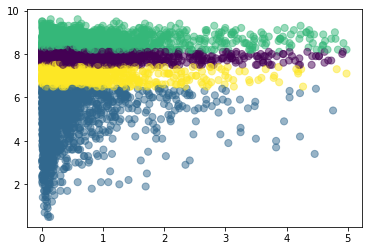

In [136]:
sample_df = DataFrame(dfd,columns=['Global_Sales','User_Score'])
  
kmeans = KMeans(n_clusters=4).fit(dfd)
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(sample_df['Global_Sales'], sample_df['User_Score'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 11], centroids[:, 4], c='red', s=10)
plt.show()

In [139]:
sample_df.isin([0]).sum()

Global_Sales    0
User_Score      0
dtype: int64

In [140]:
import scipy.cluster.hierarchy as shc


{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [25.0, 25.0, 35.0, 35.0],
  [45.0, 45.0, 55.0, 55.0],
  [30.0, 30.0, 50.0, 50.0],
  [75.0, 75.0, 85.0, 85.0],
  [65.0, 65.0, 80.0, 80.0],
  [40.0, 40.0, 72.5, 72.5],
  [10.0, 10.0, 56.25, 56.25],
  [95.0, 95.0, 105.0, 105.0],
  [125.0, 125.0, 135.0, 135.0],
  [115.0, 115.0, 130.0, 130.0],
  [100.0, 100.0, 122.5, 122.5],
  [145.0, 145.0, 155.0, 155.0],
  [175.0, 175.0, 185.0, 185.0],
  [165.0, 165.0, 180.0, 180.0],
  [150.0, 150.0, 172.5, 172.5],
  [111.25, 111.25, 161.25, 161.25],
  [33.125, 33.125, 136.25, 136.25],
  [195.0, 195.0, 205.0, 205.0],
  [225.0, 225.0, 235.0, 235.0],
  [215.0, 215.0, 230.0, 230.0],
  [245.0, 245.0, 255.0, 255.0],
  [222.5, 222.5, 250.0, 250.0],
  [200.0, 200.0, 236.25, 236.25],
  [265.0, 265.0, 275.0, 275.0],
  [305.0, 305.0, 315.0, 315.0],
  [295.0, 295.0, 310.0, 310.0],
  [285.0, 285.0, 302.5, 302.5],
  [270.0, 270.0, 293.75, 293.75],
  [218.125, 218.125, 281.875, 281.875],
  [335.0, 335.0, 345.0, 345.0],
  [325.0, 32

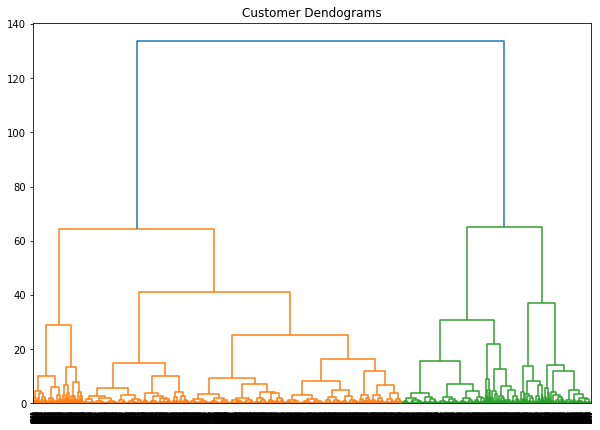

In [142]:
plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(sample_df, method='ward'))
dend